# SISEPUEDE Tutorial #4 - The `SISEPUEDE` Object

Welcome to the **SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)** tutorials! This tutorial walks users through the `SISEPUEDE` object, which is a centralized management system for models, the database, strategies, and uncertainty exploration. This notebook waslk users through:

1. Instantiating a SISEPUEDE object
2. Running scenarios and understanding dimensions of analysis (strategies, futures, design) 
4. Reading output data
5. Plotting/accessing variables

In [98]:
import warnings
warnings.filterwarnings("ignore")

import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import sisepuede as ssp
import sisepuede.manager.sisepuede_examples as sxl
import sisepuede.plotting.plots as spp
import sisepuede.transformers as trf
import sisepuede.utilities._plotting as sup
from typing import *

log = None


##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments
- Once transformations are defined, it's easy to 

In [99]:

path_strategies = # ENTER YOUR PATH HERE FOR OUTPUT STRATEGIES--SEE TUTORIAL 3 FOR MORE INFORMATION ON THIS
examples = sxl.SISEPUEDEExamples()
df_examples = examples("input_data_frame")

##  SET UP TRANSFORMATIONS/STRATEGIES
#
#  NOTE: This is an issue that's being worked out:
#        To instantiate a strategies object, need to build transformers
#        and transformations object with a dataframe. Use df_examples;
#        since we're not building tables, it won't be used, but it just
#        allows the object to instantiate.

transformers = trf.Transformers({}, df_input = df_examples,)
if not path_transformations.is_dir():
    trf.instantiate_default_strategy_directory(
        transformers,
        path_strategies,
    )
    
transformations = trf.Transformations(
    path_strategies,
    transformers = transformers,
)

strategies = trf.Strategies(
    transformations,
    export_path = "transformations",
)


# built SISEPUEDE object
sisepuede = ssp.SISEPUEDE(
    "calibrated",
    db_type = "csv", # include this if you want to save inputs
    logger = log,
    strategies = strategies,
    regions = [_REGION_NAME],
)

log = sisepuede.logger


2025-08-01 14:20:32,962 - INFO - Successfully initialized SISEPUEDEFileStructure.
2025-08-01 14:20:32,962 - INFO - Successfully initialized SISEPUEDEFileStructure.
2025-08-01 14:20:32,962 - INFO - Successfully initialized SISEPUEDEFileStructure.
2025-08-01 14:20:32,965 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2025-08-01 14:20:32,965 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2025-08-01 14:20:32,965 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2025-08-01 14:20:32,966 - INFO - 	Setting export engine to 'sqlite'.
2025-08-01 14:20:32,966 - INFO - 	Setting export engine to 'sqlite'.
2025-08-01 14:20:32,966 - INFO - 	Setting export engine to 'sqlite'.
2025-08-01 14:20:32,967 - WARNING - No index fields def

yay


2025-08-01 14:20:33,646 - INFO - Initializing FutureTrajectories
2025-08-01 14:20:33,646 - INFO - Initializing FutureTrajectories
2025-08-01 14:20:33,646 - INFO - Initializing FutureTrajectories
2025-08-01 14:20:36,018 - INFO - Instantiating 1738 sampling units.
2025-08-01 14:20:36,018 - INFO - Instantiating 1738 sampling units.
2025-08-01 14:20:36,018 - INFO - Instantiating 1738 sampling units.
2025-08-01 14:20:36,029 - INFO - Iteration 0 complete.
2025-08-01 14:20:36,029 - INFO - Iteration 0 complete.
2025-08-01 14:20:36,029 - INFO - Iteration 0 complete.
2025-08-01 14:20:38,538 - INFO - Iteration 250 complete.
2025-08-01 14:20:38,538 - INFO - Iteration 250 complete.
2025-08-01 14:20:38,538 - INFO - Iteration 250 complete.
2025-08-01 14:20:40,274 - INFO - Iteration 500 complete.
2025-08-01 14:20:40,274 - INFO - Iteration 500 complete.
2025-08-01 14:20:40,274 - INFO - Iteration 500 complete.
2025-08-01 14:20:42,010 - INFO - Iteration 750 complete.
2025-08-01 14:20:42,010 - INFO - Iter

###  Call the .project_scenarios() method (or simply call the SISEPUEDE object) to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [21]:
sisepuede.model_attributes.get_dimensional_attribute_table(
    sisepuede.key_strategy,
)

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
66,4005,IPPU:DEC_PFCS,Singleton - Default Value - IPPU: Reduce use o...,NaN,TX:IPPU:DEC_PFCS,0
67,4006,IP:ALL,Sectoral Composite - IPPU,All (unique by transformer) IPPU transformations,TX:IPPU:DEC_CLINKER|TX:IPPU:DEC_DEMAND|TX:IPPU...,0
68,6000,PFLO:INC_HEALTHIER_DIETS,Singleton - Default Value - PFLO: Change diets,NaN,TX:PFLO:INC_HEALTHIER_DIETS,0
69,6001,PFLO:INC_IND_CCS,Singleton - Default Value - PFLO: Industrial c...,NaN,TX:PFLO:INC_IND_CCS,0


In [100]:
sisepuede.model_attributes.get_dimensional_attribute_table(
    sisepuede.key_design,
)

,design_id,vary_l,vary_x,linear_transform_l_m,linear_transform_l_b,linear_transform_l_inf,linear_transform_l_sup,design_name,include
0,0,0,1,1.00,0.00,1.00,1,Vary Xs (design 0),1
1,1,1,1,0.75,0.25,0.25,1,Vary Xs and Les; Cap LE at 1 (design 1),1
2,2,1,1,1.25,0.00,0.25,1,"Vary Xs and LEs; Cap LE at 1.1 (design 2, 20% ...",1
3,3,1,0,0.90,0.10,0.10,1,Vary LEs; (design 3),1


In [113]:
# ?sisepuede.project_scenarios

In [101]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
dict_filt = {
    "future_id": [0],
    "design_id": [0],
    "strategy_id": [1020, 2012, 3025, 4006, 5009, 6002] # note that 5009 does not exist in the attribute table. 
}

primary_keys_out = sisepuede(
    dict_filt,
    chunk_size = 2 # how often do we write to the output database
)

2025-08-01 14:23:48,744 - INFO - 
***	STARTING REGION peru	***

2025-08-01 14:23:48,744 - INFO - 
***	STARTING REGION peru	***

2025-08-01 14:23:48,744 - INFO - 
***	STARTING REGION peru	***

2025-08-01 14:23:50,167 - INFO - Trying run primary_id = 21021 in region peru
2025-08-01 14:23:50,167 - INFO - Trying run primary_id = 21021 in region peru
2025-08-01 14:23:50,167 - INFO - Trying run primary_id = 21021 in region peru
2025-08-01 14:23:50,168 - INFO - Running AFOLU model
2025-08-01 14:23:50,168 - INFO - Running AFOLU model
2025-08-01 14:23:50,168 - INFO - Running AFOLU model
2025-08-01 14:23:50,422 - INFO - AFOLU model run successfully completed
2025-08-01 14:23:50,422 - INFO - AFOLU model run successfully completed
2025-08-01 14:23:50,422 - INFO - AFOLU model run successfully completed
2025-08-01 14:23:50,424 - INFO - Running CircularEconomy model
2025-08-01 14:23:50,424 - INFO - Running CircularEconomy model
2025-08-01 14:23:50,424 - INFO - Running CircularEconomy model
2025-08-01

2025-01-Aug 14:23:50.597 Opened SQLite database at /Users/usuario/git/sisepuede/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2025-01-Aug 14:23:50.605 Added NEMO structure to SQLite database at /Users/usuario/git/sisepuede/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2025-01-Aug 14:23:51.228 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-08-01 14:24:17,805 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 14:24:17,805 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 14:24:17,805 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 14:24:17,813 - INFO - EnergyProduction model run successfully completed
2025-08-01 14:24:17,813 - INFO - EnergyProduction model run successfully completed
2025-08-01 14:24:17,813 - INFO - EnergyProduction model run successfully completed
2025-08-01 14:24:17,813 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 14:24:17,813 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 14:24:17,813 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 14:24:17,837 - INFO - Fugitive Emissions from Energy 

2025-01-Aug 14:24:17.708 Finished modeling scenario.


2025-08-01 14:24:18,109 - INFO - AFOLU model run successfully completed
2025-08-01 14:24:18,109 - INFO - AFOLU model run successfully completed
2025-08-01 14:24:18,109 - INFO - AFOLU model run successfully completed
2025-08-01 14:24:18,110 - INFO - Running CircularEconomy model
2025-08-01 14:24:18,110 - INFO - Running CircularEconomy model
2025-08-01 14:24:18,110 - INFO - Running CircularEconomy model
2025-08-01 14:24:18,140 - INFO - CircularEconomy model run successfully completed
2025-08-01 14:24:18,140 - INFO - CircularEconomy model run successfully completed
2025-08-01 14:24:18,140 - INFO - CircularEconomy model run successfully completed
2025-08-01 14:24:18,140 - INFO - Running IPPU model
2025-08-01 14:24:18,140 - INFO - Running IPPU model
2025-08-01 14:24:18,140 - INFO - Running IPPU model
2025-08-01 14:24:18,186 - INFO - IPPU model run successfully completed
2025-08-01 14:24:18,186 - INFO - IPPU model run successfully completed
2025-08-01 14:24:18,186 - INFO - IPPU model run suc

2025-01-Aug 14:24:19.318 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-08-01 14:24:45,487 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 14:24:45,487 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 14:24:45,487 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 14:24:45,498 - INFO - EnergyProduction model run successfully completed
2025-08-01 14:24:45,498 - INFO - EnergyProduction model run successfully completed
2025-08-01 14:24:45,498 - INFO - EnergyProduction model run successfully completed
2025-08-01 14:24:45,499 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 14:24:45,499 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 14:24:45,499 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 14:24:45,524 - INFO - Fugitive Emissions from Energy 

2025-01-Aug 14:24:45.385 Finished modeling scenario.


2025-08-01 14:24:45,695 - INFO - Table MODEL_OUTPUT successfully written to database.
2025-08-01 14:24:45,695 - INFO - Table MODEL_OUTPUT successfully written to database.
2025-08-01 14:24:45,695 - INFO - Table MODEL_OUTPUT successfully written to database.
2025-08-01 14:24:45,701 - INFO - Trying run primary_id = 60060 in region peru
2025-08-01 14:24:45,701 - INFO - Trying run primary_id = 60060 in region peru
2025-08-01 14:24:45,701 - INFO - Trying run primary_id = 60060 in region peru
2025-08-01 14:24:45,702 - INFO - Running AFOLU model
2025-08-01 14:24:45,702 - INFO - Running AFOLU model
2025-08-01 14:24:45,702 - INFO - Running AFOLU model
2025-08-01 14:24:45,942 - INFO - AFOLU model run successfully completed
2025-08-01 14:24:45,942 - INFO - AFOLU model run successfully completed
2025-08-01 14:24:45,942 - INFO - AFOLU model run successfully completed
2025-08-01 14:24:45,942 - INFO - Running CircularEconomy model
2025-08-01 14:24:45,942 - INFO - Running CircularEconomy model
2025-08

2025-01-Aug 14:24:46.752 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-08-01 14:39:57,751 - INFO - NemoMod run failed with result INFEASIBLE. Populating missing data with value 0.0.
2025-08-01 14:39:57,751 - INFO - NemoMod run failed with result INFEASIBLE. Populating missing data with value 0.0.
2025-08-01 14:39:57,751 - INFO - NemoMod run failed with result INFEASIBLE. Populating missing data with value 0.0.
2025-08-01 14:39:57,754 - INFO - Unable to retrieve energy demand by fuel in ENTC. Skipping adding unused fuel...
2025-08-01 14:39:57,754 - INFO - Unable to retrieve energy demand by fuel in ENTC. Skipping adding unused fuel...
2025-08-01 14:39:57,754 - INFO - Unable to retrieve energy demand by fuel in ENTC. Skipping adding unused fuel...
2025-08-01 14:39:57,777 - INFO - EnergyProduction model run successfully completed
2025-08-01 14:39:57,777 - 

2025-01-Aug 14:39:57.697 Solver did not find a solution for model. No results will be saved to database.


# After running the model, we can see the primary ids that completed successfully

In [104]:
for k, v in primary_keys_out.items():
    print(v)

[21021, 34034, 60060, 67067, 70070]


##  Before we read in the data, a little on primary ids
- Primary ids are stored in a virtual table (indexing mechanism, the `sisepuede.odpt_primary` object)
- You can find the primary id using `sisepuede.odpt_primary.get_key_value`

In [106]:
sisepuede.odpt_primary.get_key_value(
    **{
        "design_id": 0,
        "future_id": 0,
        "strategy_id": 1014
    }
)



15015

##  You can quickly see what the dimensions associated with each primary key are by calling:

###  `sisepuede.odpt_primary.get_indexing_dataframe_from_primary_key`


In [107]:
sisepuede.odpt_primary.get_indexing_dataframe_from_primary_key(
    list(primary_keys_out.get(_REGION_NAME))
)

,primary_id,design_id,strategy_id,future_id
0,21021,0,1020,0
1,34034,0,2012,0
2,60060,0,3025,0
3,67067,0,4006,0
4,70070,0,6002,0


In [121]:
sisepuede.key_time_period

'time_period'

###  Retrieve outputs using SISEPUEDE.read_output()

In [124]:
df_out = sisepuede.read_output(None)
df_out[
    df_out[sisepuede.key_time_period].isin([35])
][
    [sisepuede.key_primary] + [
        x for x in df_out.columns if x.startswith("emission_co2e_subsector")
    ]
]

,primary_id,emission_co2e_subsector_total_agrc,emission_co2e_subsector_total_ccsq,emission_co2e_subsector_total_entc,emission_co2e_subsector_total_fgtv,emission_co2e_subsector_total_frst,emission_co2e_subsector_total_inen,emission_co2e_subsector_total_ippu,emission_co2e_subsector_total_lndu,emission_co2e_subsector_total_lsmm,emission_co2e_subsector_total_lvst,emission_co2e_subsector_total_scoe,emission_co2e_subsector_total_soil,emission_co2e_subsector_total_trns,emission_co2e_subsector_total_trww,emission_co2e_subsector_total_waso
35,21021,5.605105,0.000000,60.916865,13.154940,-151.216087,65.099635,34.298301,7.807897,1.730212,14.269085,62.564264,-0.026222,64.173987,8.495520,24.426263
71,34034,7.748860,0.000000,60.521535,12.974906,-133.439535,62.248210,32.525146,95.822258,2.957754,24.717112,62.564264,5.278067,64.173987,2.322382,7.620479
107,60060,7.748860,-31.089497,0.000000,NaN,-133.439535,1.388504,34.298301,95.822258,2.957754,24.717112,0.082591,5.278067,8.555641,8.495520,24.671790
143,67067,7.748860,0.000000,59.926615,12.595426,-132.253462,57.272909,13.472968,95.822258,2.957754,24.717112,62.564264,5.278067,64.173987,8.495520,24.671790
179,70070,5.656305,-31.089497,10.093525,0.668741,-151.547792,0.292290,4.254069,7.483643,1.275903,10.544599,0.082591,-0.286732,8.555641,1.989628,7.508349


####  Note that SISEPUEDE.read_output() can be used to execute additional filtering queries by using dict_subset = {}
- e.g., if we only care about the final time period, we can set
    ``dict_subset = {"time_period": 35}``

In [125]:
sisepuede.read_output(
    None, 
    dict_subset = {
        sisepuede.key_time_period: [35],
        sisepuede.key_region: [_REGION_NAME]
    }
)

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,21021,peru,35,504034.094419,630653.707204,36883.213095,340538.756698,1336.617584,3910.152280,121561.569644,...,4.943915e+06,6684.344438,15044.702148,482973.849039,605978.769222,436212.701874,2.738675e+06,8.055046e+06,5.503755e+06,2.334445e+06
1,34034,peru,35,623791.054122,796242.995428,46419.829576,423417.049764,1548.708859,4647.121032,152499.107213,...,5.122612e+06,6454.166734,14900.219070,504909.294071,638377.360401,455865.774649,2.926815e+06,8.758686e+06,5.702571e+06,2.418559e+06
2,60060,peru,35,623791.054122,796242.995428,46419.829576,423417.049764,1548.708859,4647.121032,152499.107213,...,5.122612e+06,6454.166734,14900.219070,504909.294071,638377.360401,455865.774649,2.926815e+06,8.758686e+06,5.702571e+06,2.418559e+06
3,67067,peru,35,623791.054122,796242.995428,46419.829576,423417.049764,1548.708859,4647.121032,152499.107213,...,5.122612e+06,6454.166734,14900.219070,504909.294071,638377.360401,455865.774649,2.926815e+06,8.758686e+06,5.702571e+06,2.418559e+06
4,70070,peru,35,503866.895303,592955.342435,36870.895997,352698.373318,1336.171220,4049.767539,125901.342526,...,5.120447e+06,6682.112111,15581.885614,500216.106962,605776.394842,451785.576287,2.836408e+06,8.052329e+06,5.700277e+06,2.417801e+06


###  1. We can examine aggregate emissions across scenarios

In [126]:
# could query this, but our dataset is small enough to store in memory
df_out_region = (
    df_out[
        df_out[sisepuede.key_region].isin([_REGION_NAME])
    ]
    .reset_index(drop = True)
)

In [130]:
sisepuede.odpt_primary.get_indexing_dataframe_from_primary_key(
    list(primary_keys_out.get(_REGION_NAME))
)

,primary_id,design_id,strategy_id,future_id
0,21021,0,1020,0
1,34034,0,2012,0
2,60060,0,3025,0
3,67067,0,4006,0
4,70070,0,6002,0


In [131]:
strategies.get_strategy(1020).name

'Sectoral Composite - AFOLU'

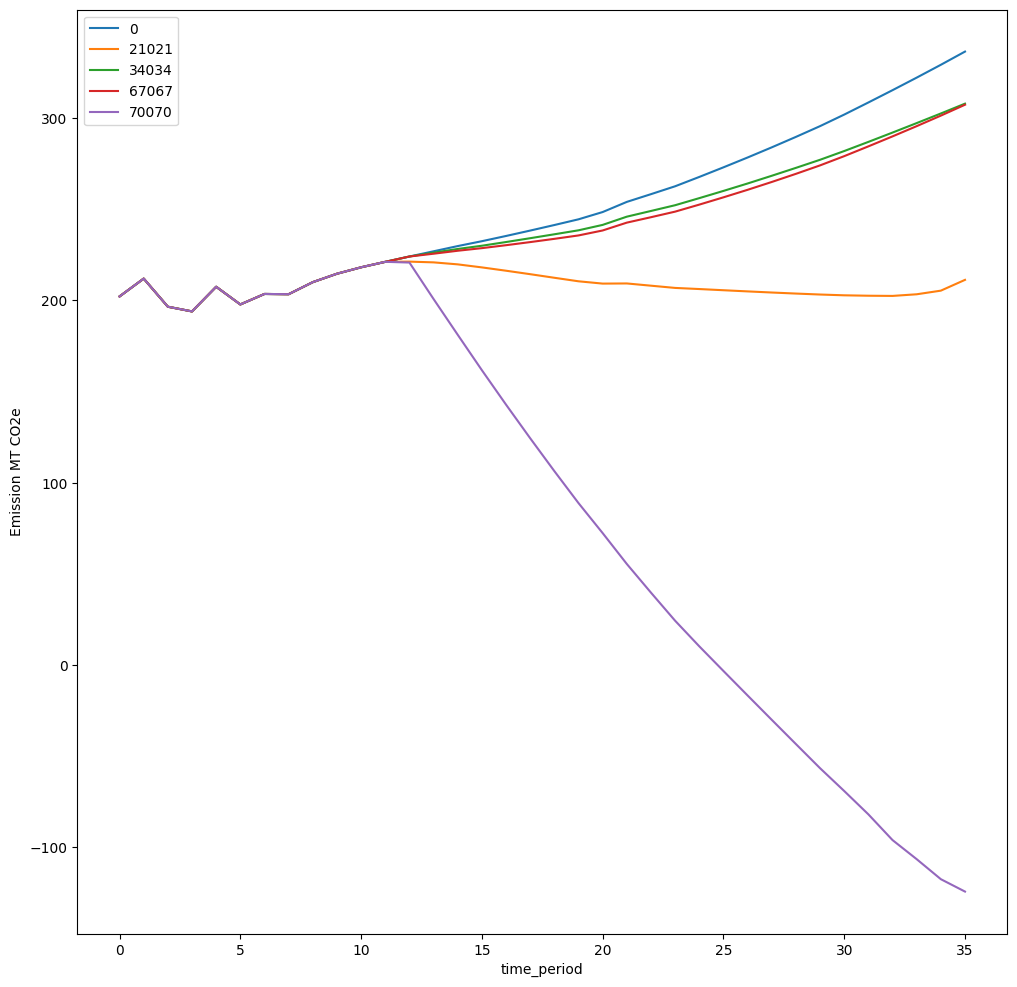

In [141]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")
# 
all_primaries = sorted(list(df_out_region[sisepuede.key_primary].unique()))
dfg = df_out_region.groupby([sisepuede.key_primary])

for i, df_cur in dfg:

    if i[0] == 60060: continue
    
    y = np.array(df_cur[
        [x for x in df_out.columns if x.startswith("emission_co2e_subsector_")]
    ].sum(axis = 1)) 
    x = np.array(df_cur[sisepuede.key_time_period])
    
    ax.plot(x, y, label = i)
    

ax.legend()


##  Oops! Missing baseline
- Baseline strategy is always 0
- We can re-run sisepuede, and if we include and runs that have already been run, the db management system will avoid re-running those

In [132]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
dict_filt = {
    "future_id": [0],
    "design_id": [0],
    "strategy_id": [0, 1020, 6002] 
}

primary_keys_out_2 = sisepuede(
    dict_filt,
    chunk_size = 2 # how often do we write to the output database
)

2025-08-01 14:53:44,004 - INFO - 
***	STARTING REGION peru	***

2025-08-01 14:53:44,004 - INFO - 
***	STARTING REGION peru	***

2025-08-01 14:53:44,004 - INFO - 
***	STARTING REGION peru	***

2025-08-01 14:53:45,515 - INFO - Trying run primary_id = 0 in region peru
2025-08-01 14:53:45,515 - INFO - Trying run primary_id = 0 in region peru
2025-08-01 14:53:45,515 - INFO - Trying run primary_id = 0 in region peru
2025-08-01 14:53:45,516 - INFO - Running AFOLU model
2025-08-01 14:53:45,516 - INFO - Running AFOLU model
2025-08-01 14:53:45,516 - INFO - Running AFOLU model
2025-08-01 14:53:45,776 - INFO - AFOLU model run successfully completed
2025-08-01 14:53:45,776 - INFO - AFOLU model run successfully completed
2025-08-01 14:53:45,776 - INFO - AFOLU model run successfully completed
2025-08-01 14:53:45,777 - INFO - Running CircularEconomy model
2025-08-01 14:53:45,777 - INFO - Running CircularEconomy model
2025-08-01 14:53:45,777 - INFO - Running CircularEconomy model
2025-08-01 14:53:45,80

##  Have to read the output again

In [133]:
df_out = sisepuede.read_output(None)

# could query this, but our dataset is small enough to store in memory
df_out_region = (
    df_out[
        df_out[sisepuede.key_region].isin([_REGION_NAME])
    ]
    .reset_index(drop = True)
)

df_out_region

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,21021,peru,0,369318.579985,688160.487871,39882.929854,316572.871666,1366.720811,3728.490914,130301.410464,...,3.731296e+06,5555.993440,11355.243362,378727.564583,503633.028662,342059.520501,2.319395e+06,7.515753e+06,4.153821e+06,1.761864e+06
1,21021,peru,1,375963.609292,699048.055968,40908.093268,315394.580799,1373.371668,3811.408180,127746.355708,...,3.841742e+06,5653.209987,11398.207126,395965.811671,486349.939241,339149.677945,2.294308e+06,7.316972e+06,4.180498e+06,1.765765e+06
2,21021,peru,2,399717.348929,704397.625509,40574.983653,330787.976447,1402.706856,3925.092807,123104.309575,...,3.815342e+06,5798.579740,11819.631989,422380.119815,511651.244522,359997.743957,2.345862e+06,7.944365e+06,4.362546e+06,1.838622e+06
3,21021,peru,3,452890.712240,700686.646403,39479.737886,328210.609595,1410.650935,3983.012721,122930.418745,...,4.003149e+06,5830.784803,11916.577092,402637.090296,512007.216747,365696.116515,2.527799e+06,7.924647e+06,4.405954e+06,1.894865e+06
4,21021,peru,4,480625.729684,708968.471549,39705.402125,333333.923557,1428.870660,3935.287243,124045.596903,...,4.032763e+06,5954.747319,12617.843285,410702.587260,502753.949519,363631.600007,2.459004e+06,8.143609e+06,4.538689e+06,1.922603e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,peru,31,614893.820915,788035.270483,45876.036864,417477.636511,1533.456186,4586.557411,150552.539139,...,5.050756e+06,6390.601998,14706.031956,498464.403469,630837.780425,450050.083741,2.896571e+06,8.687332e+06,5.622582e+06,2.384639e+06
212,0,peru,32,617907.721433,790387.651631,46045.677563,419500.906311,1537.752230,4606.561502,151192.268150,...,5.075234e+06,6408.505541,14770.171732,500582.481989,633199.605404,451960.899745,2.905558e+06,8.704871e+06,5.649830e+06,2.396193e+06
213,0,peru,33,620462.250995,792574.961504,46195.012698,421192.350872,1541.748420,4623.555217,151735.110257,...,5.095697e+06,6425.159461,14824.659235,502379.777577,635274.183755,453582.538905,2.913525e+06,8.722289e+06,5.672609e+06,2.405853e+06
214,0,peru,34,622464.863354,794550.168794,46321.140201,422516.857658,1545.416277,4637.241171,152174.891425,...,5.111722e+06,6440.445063,14868.540954,503835.848599,637020.159609,454896.596509,2.920592e+06,8.740065e+06,5.690447e+06,2.413417e+06


###  2. We can also see CO2e by subsector

###  Look at primary ids

In [142]:
primary_keys = primary_keys_out.get(_REGION_NAME)
sisepuede.odpt_primary.get_indexing_dataframe_from_primary_key(
    sorted(df_out[sisepuede.key_primary].unique())
)


,primary_id,design_id,strategy_id,future_id
0,0,0,0,0
1,21021,0,1020,0
2,34034,0,2012,0
3,60060,0,3025,0
4,67067,0,4006,0
5,70070,0,6002,0


In [40]:
?sisepuede.odpt_primary.get_key_value

Signature: sisepuede.odpt_primary.get_key_value(**kwargs) -> int
Docstring: Get the key value associated with an input set of dimensional values.
File:      ~/Documents/Projects/git_jbus/sisepuede/python/ordered_direct_product_table.py
Type:      method


###  Examine baseline strategy

(<Figure size 1200x700 with 1 Axes>,
 <Axes: xlabel='time_period', ylabel='Emission MT CO2e'>)

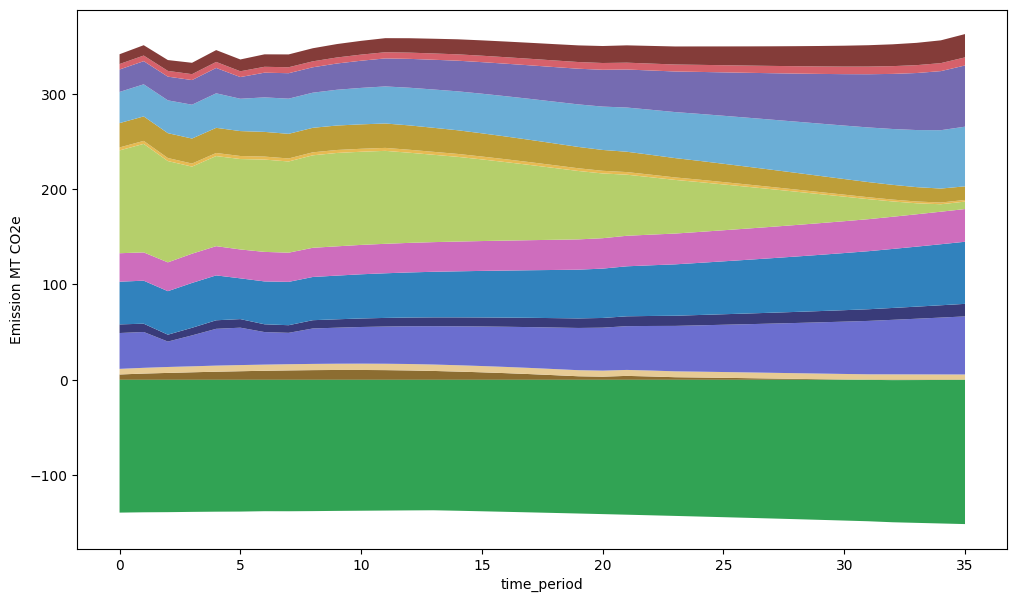

In [146]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")

# get scenario key from dictionary
primary_id = sisepuede.odpt_primary.get_key_value(
    **{
        sisepuede.key_design: 0,
        sisepuede.key_future: 0,
        sisepuede.key_strategy: 1020,
    }
)
df_cur = df_out_region[df_out_region[sisepuede.key_primary].isin([primary_id])]

spp.plot_emissions_stack(
    df_cur,
    sisepuede.model_attributes,
    figtuple = (fig, ax), 
)

#ax.legend()



## How about strategy 6002?

In [82]:
strategies.get_strategy(6002).name


'All Actions'

(<Figure size 1200x700 with 1 Axes>,
 <Axes: xlabel='time_period', ylabel='Emission MT CO2e'>)

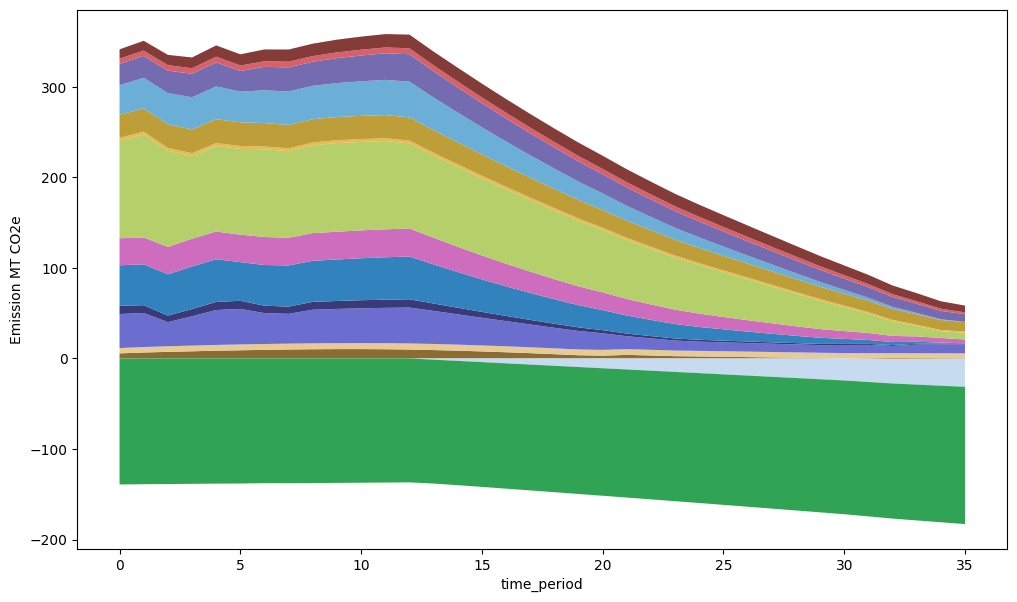

In [76]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")

# get scenario key from dictionary
primary_id = sisepuede.odpt_primary.get_key_value(
    **{
        sisepuede.key_design: 0,
        sisepuede.key_future: 0,
        sisepuede.key_strategy: 6002,
    }
)
df_cur = df_out_region[df_out_region[sisepuede.key_primary].isin([primary_id])]

spp.plot_emissions_stack(
    df_cur,
    sisepuede.model_attributes,
    figtuple = (fig, ax), 
)



###  3a. We can go further down and look at gas within subsector - CH4 emisions from Livestock Enteric Fermentation

In [163]:
# look for baseline
primary_id = sisepuede.odpt_primary.get_key_value(
    **{
        sisepuede.key_design: 0,
        sisepuede.key_future: 0,
        sisepuede.key_strategy: 1020
    }
)

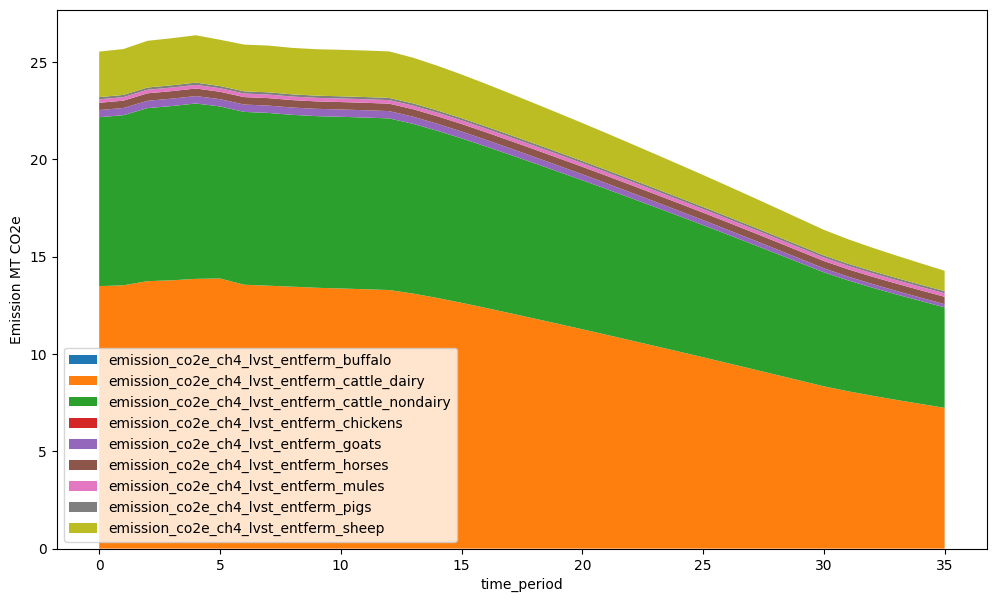

In [165]:
# variable to examine
modvar = sisepuede.model_attributes.get_variable(
    ":math:\\text{CH}_4 Emissions from Livestock Enteric Fermentation",
    #"Land Use Area"
)


fig, ax = plt.subplots(figsize = (12, 7))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")


df_cur = df_out_region[df_out_region[sisepuede.key_primary].isin([primary_id])]

sup.plot_stack(
    df_cur,
    modvar.fields,
    figtuple = (fig, ax, ),
)

ax.legend()

###  3b. HFCs and PFCs in IPPU

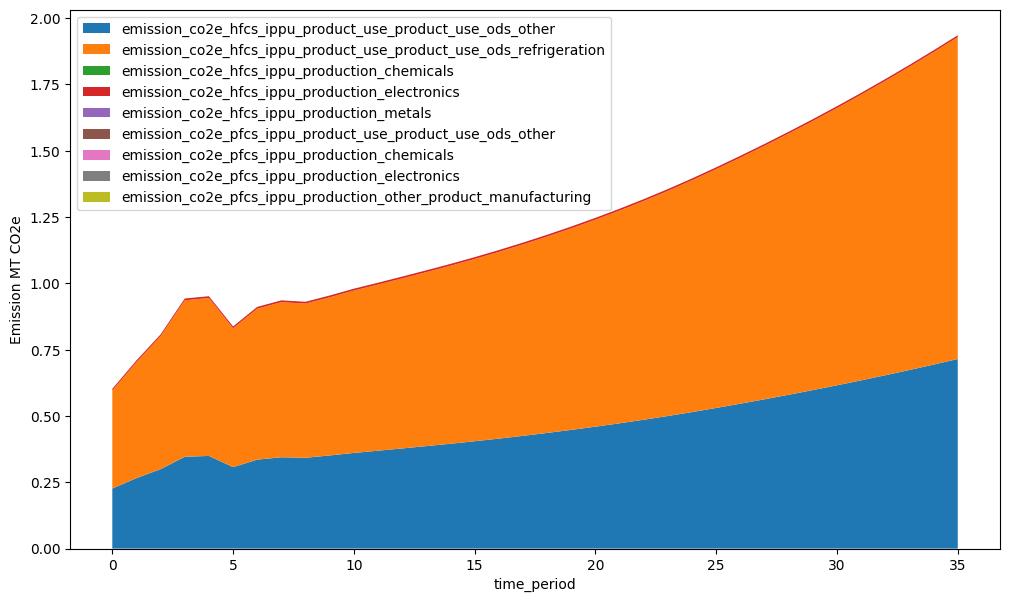

In [166]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")


fields = [
    x for x in df_cur.columns 
    if x.startswith("emission_co2e_") and ("_ippu_" in x) and (("hfcs" in x) or ("pfcs" in x))
]


sup.plot_stack(
    df_cur,
    fields,
    figtuple = (fig, ax, ),
)

ax.legend()

###  4. The land use reallocation factor affects land use, imports, and exports

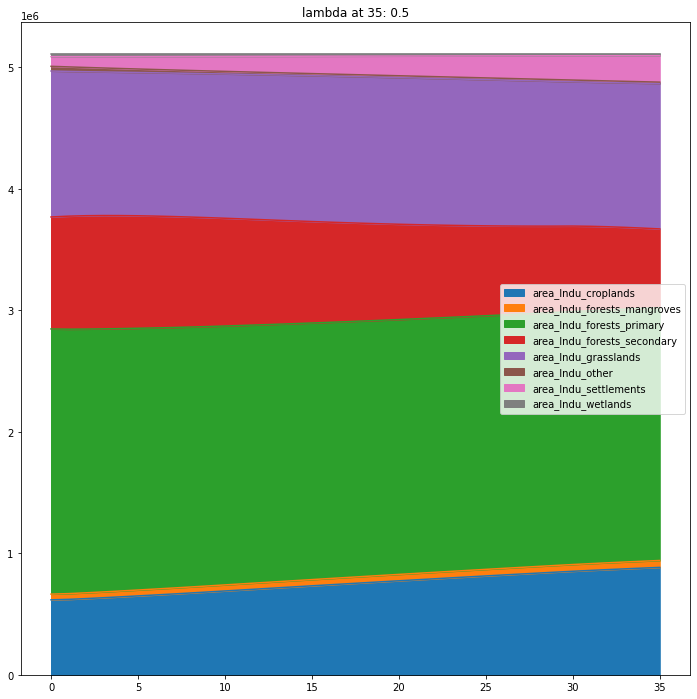

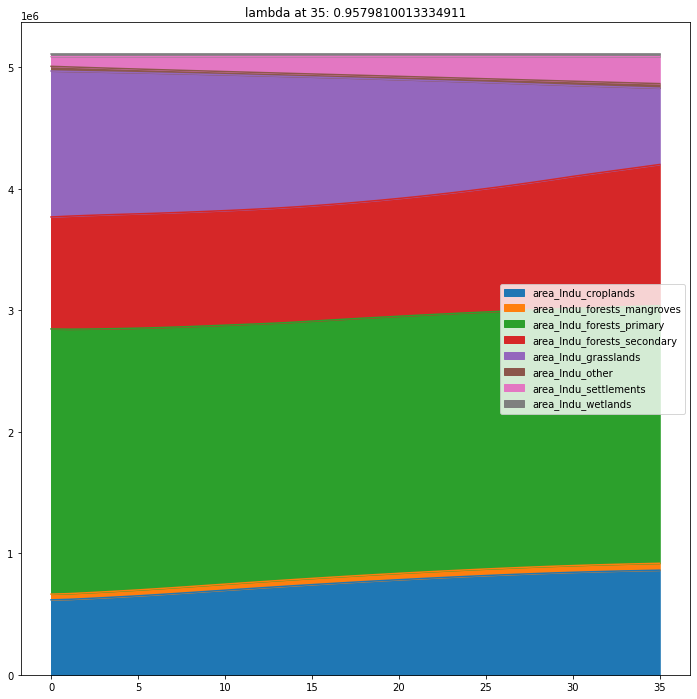

In [18]:
for ind in [0, 4]:
    i = primary_keys_out[ind]
    fig, ax = plt.subplots(figsize = (12, 12))
    
    df_cur = df_out[df_out["primary_id"] == i]
    df_cur = sisepuede.model_attributes.extract_model_variable(df_cur, "Land Use Area", return_type = "data_frame")
    
    val = sisepuede.generate_scenario_database_from_primary_key(i)["DEMO"]["lndu_reallocation_factor"].iloc[-1]
    
    df_cur.plot.area(ax = ax)
    ax.set_title(f"lambda at 35: {val}")
    
    plt.show()
    
    

###  5. Database functionality streamlines parallelization and analysis

##  Suppose you want to generate a certain future using a primary id


In [173]:
p_id = sisepuede.odpt_primary.get_key_value(
    **{
        "design_id": 0,
        "future_id": 0,
        "strategy_id": 6002
    }
)

print(f"{sisepuede.key_primary} = {p_id}")

primary_id = 70070


# You can generate tables on the fly using primary ids
- e.g., say you want to see what the input associated with future_id 145, strategy 6002, design 0 looks like
- You could also feed `generate_scenario_database_from_primary_key` a dictionary of dimensional values

In [174]:

# create a dictionary of runs since different regions will have different dbs
dict_db = sisepuede.generate_scenario_database_from_primary_key(p_id);
df_pid = dict_db.get("peru")

# look at the dataframe
df_pid.head()

,primary_id,region,time_period,area_gnrl_country_ha,area_lndu_infimum_croplands_ha,area_lndu_infimum_flooded_ha,area_lndu_infimum_forests_mangroves_ha,area_lndu_infimum_forests_primary_ha,area_lndu_infimum_forests_secondary_ha,area_lndu_infimum_grasslands_ha,...,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha,yf_lndu_supremum_pastures_tonne_per_ha
0,70070,peru,0,128522000.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,4.06520,3.045533,2.906550,15.8623,1.69064,7.8884,120.7446,11.91872,17.830138,92.81
1,70070,peru,1,128522000.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,4.11630,2.990550,3.099625,14.4220,1.62074,7.5453,112.1206,11.76626,17.452367,92.81
2,70070,peru,2,128522000.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,4.13385,3.011300,3.431075,14.4531,1.69168,7.3091,121.2463,12.02988,17.691529,92.81
3,70070,peru,3,128522000.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,4.13340,2.991850,3.275325,13.9065,1.73058,8.1242,121.8343,12.10522,18.420638,92.81
4,70070,peru,4,128522000.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,4.16745,3.206333,3.310900,12.4729,1.67081,7.7002,126.0845,12.41426,18.582676,92.81


In [182]:
inds = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").available_indices
inds

{('peru', 0),
 ('peru', 21021),
 ('peru', 34034),
 ('peru', 60060),
 ('peru', 67067),
 ('peru', 70070)}

In [184]:
sisepuede.odpt_primary.get_indexing_dataframe_from_primary_key([x[1] for x in sorted(list(inds))])


,primary_id,design_id,strategy_id,future_id
0,0,0,0,0
1,21021,0,1020,0
2,34034,0,2012,0
3,60060,0,3025,0
4,67067,0,4006,0
5,70070,0,6002,0
